<a href="https://colab.research.google.com/github/kpjaskie/SenSIP21/blob/main/4_Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Algorithms

In this notebook, we will introduce regression algorithms by looking more closely into linear regression on simulated and real-world datasets.
 

In [1]:
# First, we need to import the relavent libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

(50,)

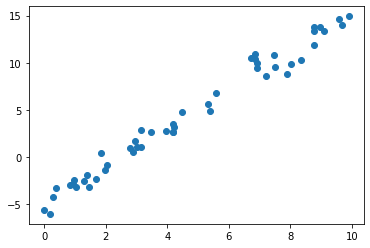

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);
x.shape

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

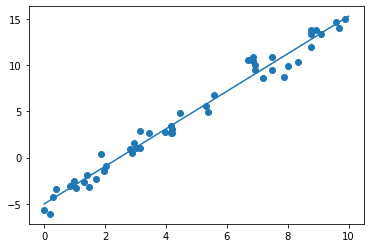

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) #The fit_intercept=True means that 
                                             #we are not assuming the data is 
                                             #pre-centered
model.fit(x[:, np.newaxis], y) #The np.newaxis is required here because when x 
                               #was created, it was 1d: shape = (50,). Model.fit 
                               #requires 2d data. New shape = (50,1)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


We see that the results are very close to the inputs, as we might hope.

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
y=a0+a1x1+a2x2+⋯
where there are multiple x values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000051
[ 1.5 -2.   1. ]


Here the  y  data is constructed from three random  x  values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single LinearRegression estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

We can make our data more complex by creating a polynomial function.  We're going to start by generating part of a sinusoid.

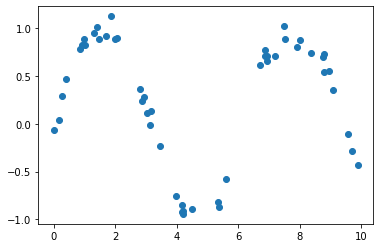

In [6]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

If we try to fit this using a straightforward logistic regression, it's not going to work well.  This is because we only have one feature, so linear regression is constrained to come up with a solution of only one variable.

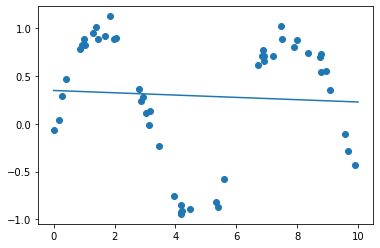

In [7]:
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

There are two ways to fix this.  We can manually create additional nonlinear features.  This is still using linear regression as the solution is linear in terms of the number of features.

To use a polynomial such as 
$$f(x)=ax + bx^2 + cx^3 + m $$

we can manually create extra columns/features for the values of $x^2$, $x^3$, and so on.

We can fit this curve pretty well with a seventh order polynomial.

In [8]:
#create extra polynomial features:
x2 = x**2
x3 = x**3
x4 = x**4
x5 = x**5
x6 = x**6
x7 = x**7

#Now combine all features into a single feature matrix
x_poly = np.concatenate((x[:, np.newaxis], x2[:, np.newaxis], x3[:, np.newaxis], 
                         x4[:, np.newaxis], x5[:, np.newaxis], 
                         x6[:, np.newaxis], x7[:, np.newaxis]), axis=1)
x_poly.shape

(50, 7)

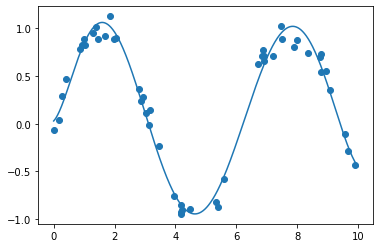

In [9]:
model.fit(x_poly, y)

xfit = np.linspace(0, 10, 1000)
xfit2 = xfit**2
xfit3 = xfit**3
xfit4 = xfit**4
xfit5 = xfit**5
xfit6 = xfit**6
xfit7 = xfit**7
xfit_poly = np.concatenate((xfit[:, np.newaxis], xfit2[:, np.newaxis], 
                            xfit3[:, np.newaxis], xfit4[:, np.newaxis],
                            xfit5[:, np.newaxis], xfit6[:, np.newaxis], 
                            xfit7[:, np.newaxis]), axis=1)
yfit = model.predict(xfit_poly)

plt.scatter(x, y)
plt.plot(xfit, yfit);

So that worked, but it was kind of a pain to put together.  Not very elegant.  Fortunately, sklearn has a shortcut that makes this much easier, using a pipeline.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(7), #here we tell it to go up to 
                           LinearRegression())    #an order seven polynomial

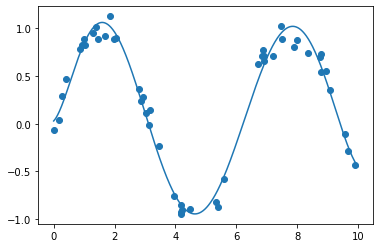

In [11]:
poly_model.fit(x[:, np.newaxis], y)  #fit with the original x in 1 dimension
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Much simpler!

You will start to run into problems if you use too high of an order polynomial or too many features.  Then, we can start running into overfitting problems.

# Real World Example - Predicting Covid-19 Deaths

Here, we're going to look at the total deaths per day in the US since the first confirmed Covid-19 death on March 1st, 2020.  You'll want to have the file "covid_deaths.txt" downloaded onto your computer.

In [12]:
#Upload the data from your computer
from google.colab import files
uploaded = files.upload()

Saving covid_deaths.txt to covid_deaths.txt


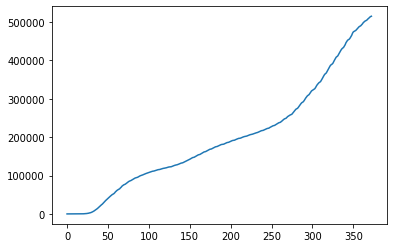

In [13]:
data_path = '/content/covid_deaths.txt'
data = np.loadtxt(data_path)

x = np.linspace(0, data.shape[0], data.shape[0])
y = data

plt.plot(x,y)

Play around with the number of polynomial features used in the code below.  What's the best number?  This number is a hyperparameter.  We create a function to perform a search to find the ideal hyperparameter for our data.  We'll use the mean square error (MSE) as our metric to tune this hyperparameter. 

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def find_poly_order(x_train, y_train, x_test, y_test, max_poly_level=20):
    
    error = np.zeros((max_poly_level,1))

    for i in range(max_poly_level):
        poly_model = make_pipeline(PolynomialFeatures(i+1), LinearRegression())    
        poly_model.fit(x_train[:, np.newaxis], y_train)  

        #calculate the results just for the training points
        y_hat = poly_model.predict(x_test[:, np.newaxis])
        error[i] = mean_squared_error(y_test, y_hat)
        
    poly_vals = range(1, max_poly_level+1)

    # Calculate the polynomial order that minimizes the MSE
    best_poly_val = np.argmin(error)

    return best_poly_val, poly_vals, error


Now that we have this function, we can use it and plot the results.


The best poly level is  6 




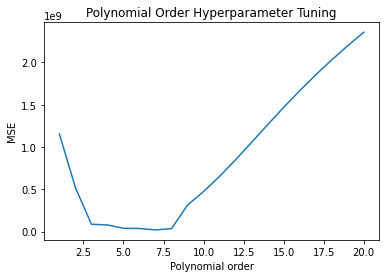

In [15]:
best_poly_val, poly_vals, error = find_poly_order(x_train=x, y_train=y, 
                                                  x_test=x, y_test=y)

# Plot our error results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Polynomial order')
ax.set_ylabel('MSE')
ax.set_title('Polynomial Order Hyperparameter Tuning')
plt.plot(poly_vals, error)

print("\nThe best poly level is ", best_poly_val,"\n\n")

So it looks like an 6th order polynomial provides the lowest error.  Let's see what that looks like.

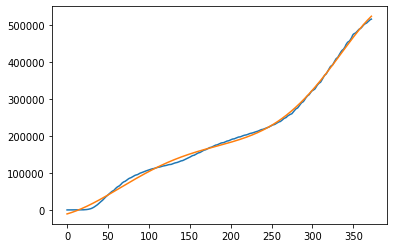

In [16]:
poly_model = make_pipeline(PolynomialFeatures(6), LinearRegression())    
poly_model.fit(x[:, np.newaxis], y)  

xfit = np.linspace(0, data.shape[0], 2000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.plot(x, y)
plt.plot(xfit, yfit);

Wow!  That looks really good!  What if we try extending our forcast?  Try looking 100 days into the future.  Does that look right to you?

-101295.5000413282


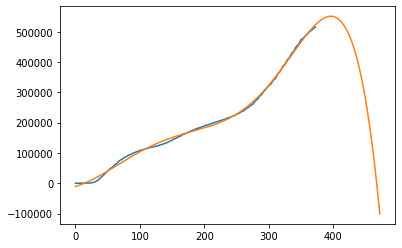

In [19]:
days_in_future = 100

xfit_future = np.linspace(0, data.shape[0] + days_in_future, 2000)
yfit_future = poly_model.predict(xfit_future[:, np.newaxis])

plt.plot(x, y)
plt.plot(xfit_future, yfit_future);

print(yfit_future[-1])

If you choose to forecast 100 days into the future, you can see that our model is predicting a shape very different from what we might expect by looking at the data ourselves.  This suggests that while our model looks like it fits our existing data well, it doesn't seem to be predictive.  
<br/><br/>
We can see that our model isn't doing a good job, but how can we realize that algorithmically?  This is where training, validation, and test sets come in handy.

To do this, we're going to break our data up by taking the first 70% of the data to train from, and the remaining 30% we'll split into validation and test sets.  Validation sets can be thought of as test sets that are used to tune the hyperparameters.  After the hyperparameters are tuned, the data is retrained on the training and validation data.  It is then finally tested on the test data composing the last 15% of our data.

This will tell us how predictive our model is.

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test_and_val, y_train, y_test_and_val = train_test_split(x, y, test_size=0.3, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test_and_val, y_test_and_val, test_size=0.5, random_state=1)

print("train_size = ", x_train.shape[0])
print("val_size = ", x_val.shape[0])
print("test_size = ",  x_test.shape[0])

train_size =  260
val_size =  56
test_size =  56


Now that these are split up, let's train and test our model on the validation data.

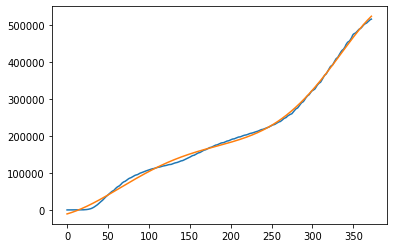

In [21]:
# First, we train our regression model on the training set, then we test it on 
# the validation set. We do this repeatedly with different orders of 
# polynomials and compare the error.
best_poly_val, poly_vals, error = find_poly_order(x_train=x_train, y_train=y_train, 
                                                  x_test=x_val, y_test=y_val)

# Once we have the best polynomial order determined, we can use regression
poly_model = make_pipeline(PolynomialFeatures(best_poly_val), LinearRegression())    
poly_model.fit(x_train[:, np.newaxis], y_train)  

# Fit the training data to our model
xfit_train = np.linspace(0, x_train.shape[0] + x_val.shape[0], 2000)
y_val_hat = poly_model.predict(xfit[:, np.newaxis])

plt.plot(x, y)
plt.plot(xfit, yfit);

Finally, let's train our train and validation data using the polynomial order we discovered above and see how our algorithm works on the test data.

In [22]:
x_train_final = np.concatenate(x_train, x_val)
y_train_final = np.concatenate(y_train, y_val)

poly_model = make_pipeline(PolynomialFeatures(best_poly_val), LinearRegression())    
poly_model.fit(x_train_final[:, np.newaxis], y_train_final)  

# Fit the training data to our model
x_final_fit = np.linspace(0, x_train_final.shape[0], 2000)
y_final_hat = poly_model.predict(x_final_fit[:, np.newaxis])

plt.plot(x, y)
plt.plot(x_final_fit, y_final_hat);

TypeError: ignored